In [191]:
import pandas as pd
import numpy as np
import os as os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
# setting up relative paths
pwd = os.getcwd()
root_dir = os.path.dirname(pwd)
dataset_path =os.path.abspath( os.path.join(root_dir,'data','laptop_data.csv'))
dataset_path

'e:\\laptop price predictor\\Laptop-Price-Predictor\\data\\laptop_data.csv'

In [193]:
df = pd.read_csv(dataset_path)
df


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [194]:
# data cleaning
df.drop(columns="Unnamed: 0",inplace=True,axis=1)
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int')
df['Weight'] = df['Weight'].astype('float')


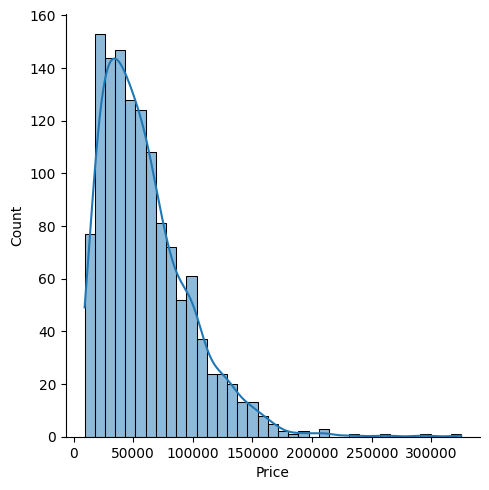

In [195]:
# #EDA
sns.displot(df['Price'],kde=True)
# left side skewed

<Axes: xlabel='Company'>

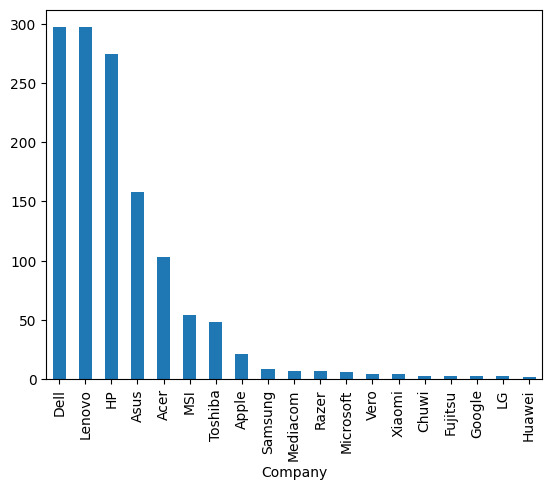

In [196]:
# ,checking which company have more laptop count in dataset

df['Company'].value_counts().plot(kind = 'bar')

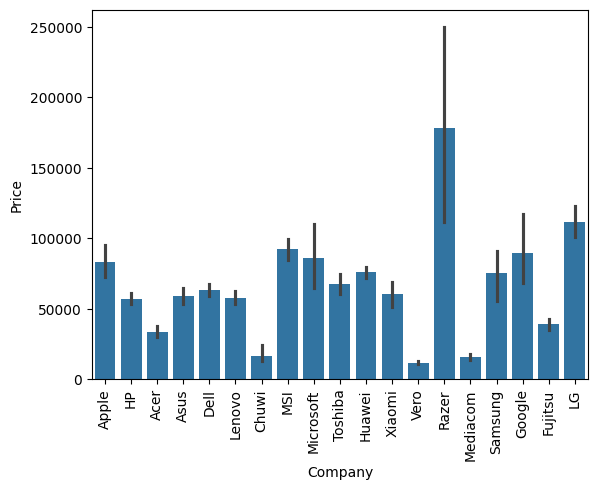

In [197]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

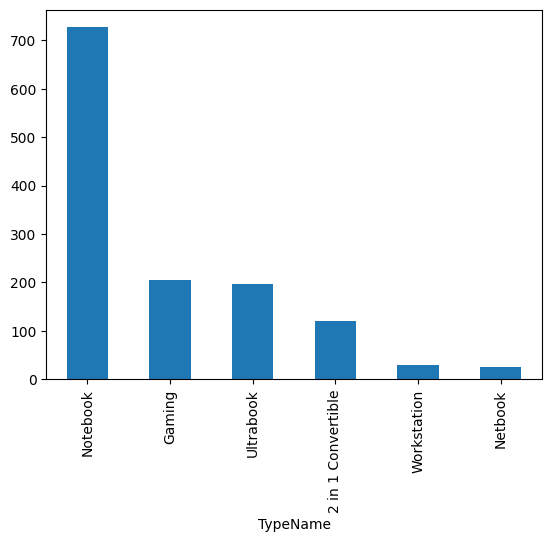

In [198]:
df['TypeName'].value_counts().plot(kind='bar')

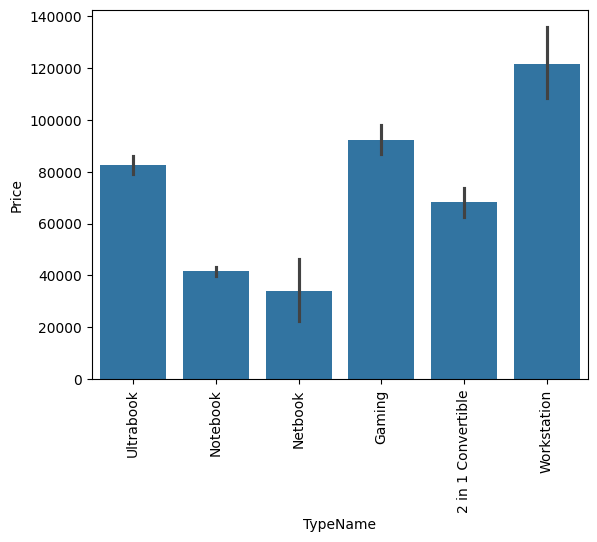

In [199]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches'>

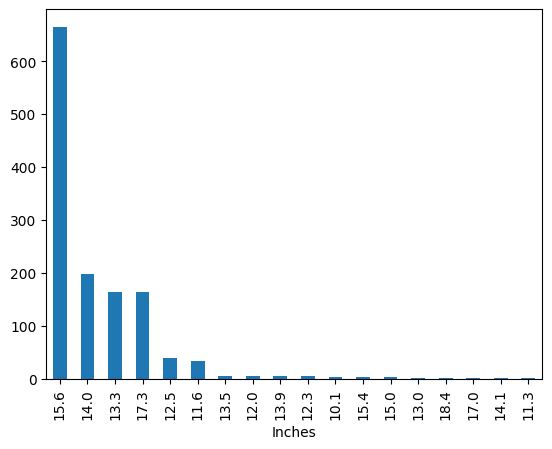

In [200]:
df['Inches'].value_counts().plot(kind='bar')

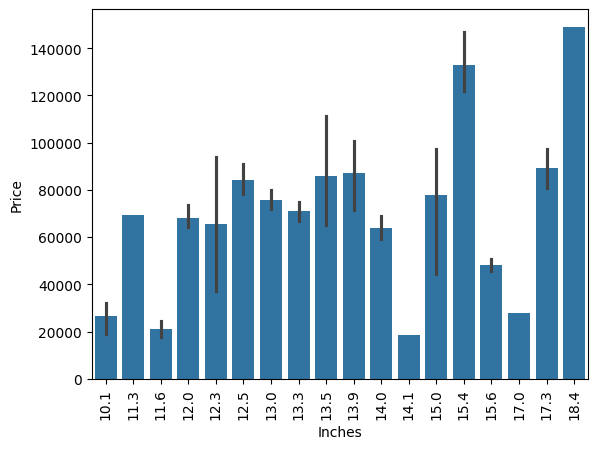

In [201]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

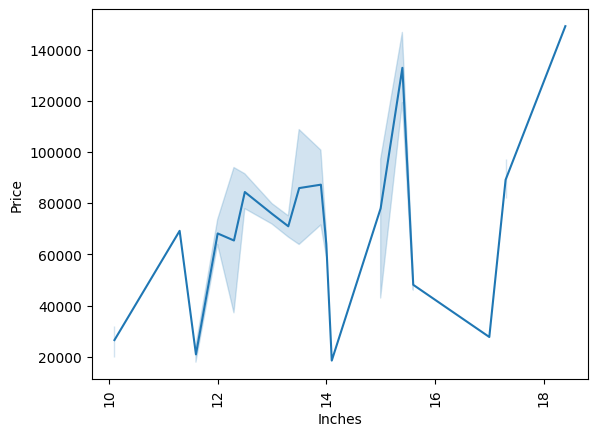

In [202]:
sns.lineplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()
# there is low correlation between price and inches

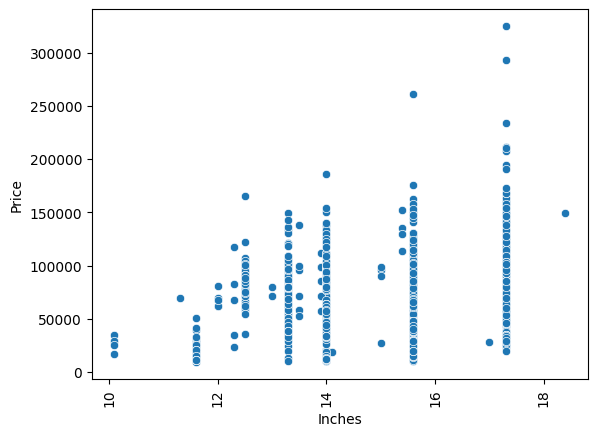

In [203]:
sns.scatterplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [204]:
def transform_size(x):
        if x < 12:
            return 'small'
        elif x > 17:
            return 'big'
        else:
             return 'medium'
        
df['size'] = df['Inches'].apply(transform_size)

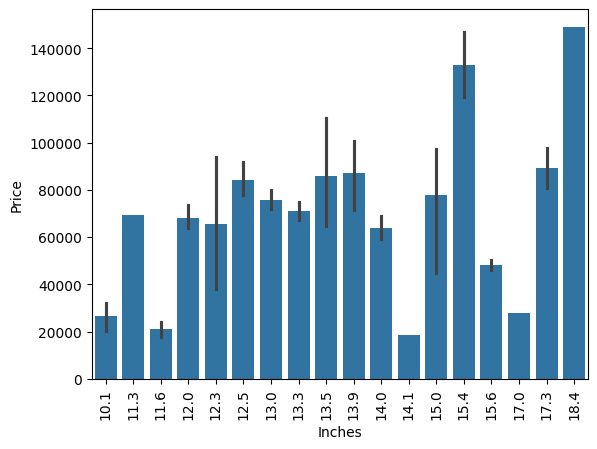

In [205]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [206]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [207]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen'in x else 0 )
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel'in x else 0 )

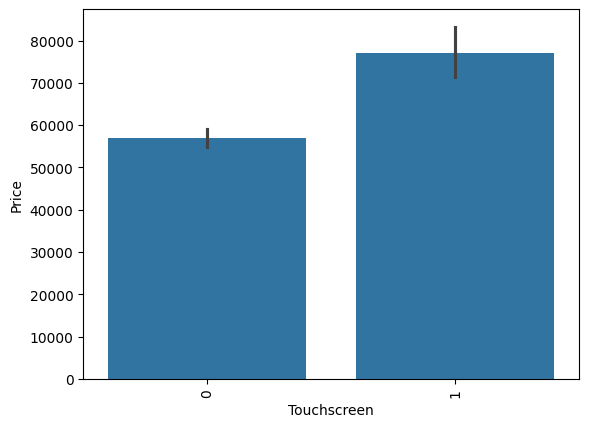

In [208]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

plt.xticks(rotation = 'vertical')
plt.show()

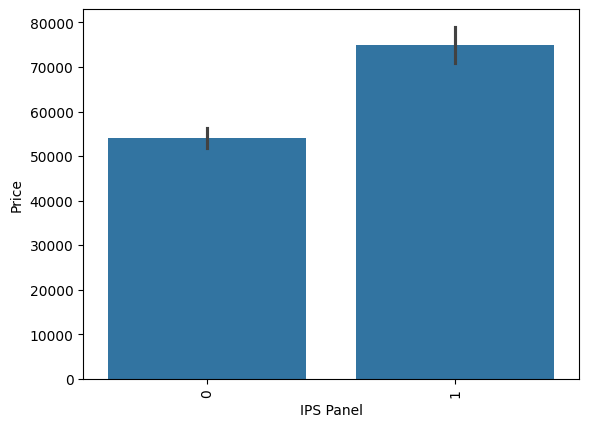

In [209]:
sns.barplot(x=df['IPS Panel'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [210]:
temp = df['ScreenResolution'].str.split(" ")
df['Screen-Resolution'] = temp.apply(lambda x : x[len(x)-1])


<Axes: xlabel='Screen-Resolution'>

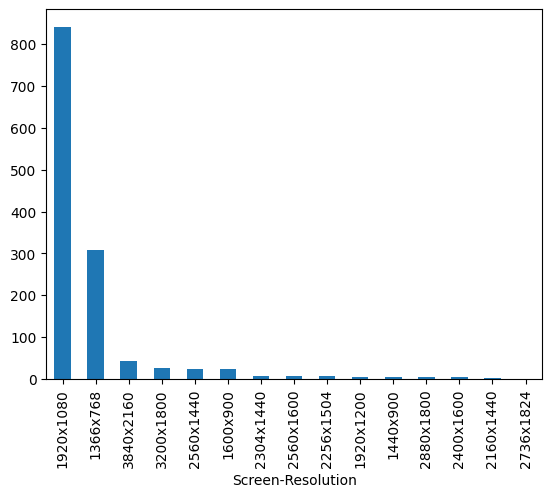

In [211]:
df['Screen-Resolution'].value_counts().plot(kind='bar')

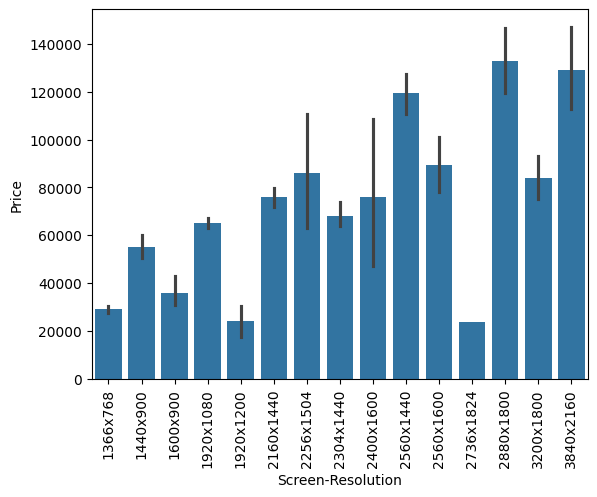

In [212]:
dummy_df = df.sort_values('Screen-Resolution')
sns.barplot(x=dummy_df['Screen-Resolution'],y=dummy_df['Price'],)

plt.xticks(rotation = 'vertical')

plt.show()

In [213]:

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   ScreenResolution   1303 non-null   object 
 4   Cpu                1303 non-null   object 
 5   Ram                1303 non-null   int64  
 6   Memory             1303 non-null   object 
 7   Gpu                1303 non-null   object 
 8   OpSys              1303 non-null   object 
 9   Weight             1303 non-null   float64
 10  Price              1303 non-null   float64
 11  size               1303 non-null   object 
 12  Touchscreen        1303 non-null   int64  
 13  IPS Panel          1303 non-null   int64  
 14  Screen-Resolution  1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,size,Touchscreen,IPS Panel,Screen-Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,medium,0,1,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,medium,0,0,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,medium,0,0,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,medium,0,1,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,medium,0,1,2560x1600


In [214]:
df['Company'] = df['Company'].astype('category')
df['TypeName'] = df['TypeName'].astype('category')
df['Inches'] = df['Inches'].astype('category')
df['Screen-Resolution'] = df['Screen-Resolution'].astype('string')


In [215]:
resol = list(((df['Screen-Resolution'].apply(lambda x : x.split('x')))))
resol = pd.DataFrame(resol)
resol['Inches'] = df['Inches']
resol[0]= resol[0].astype('int')
resol[1] =resol[1].astype('int')
resol['Inches']=resol['Inches'].astype('float')

# ((resol[0]**2 + resol[1]**2)**0.5)/resol['Inches']

In [216]:
resol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1303 non-null   int64  
 1   1       1303 non-null   int64  
 2   Inches  1303 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 30.7 KB


In [217]:

df['PPI'] = (((resol[0]**2 + resol[1]**2)**0.5)/resol['Inches']).astype('float')

In [218]:
df.drop(columns='ScreenResolution',inplace=True)
df.drop(columns='Inches',inplace=True)
df.drop(columns=['Screen-Resolution'],inplace=True)

In [219]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,size,Touchscreen,IPS Panel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,medium,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,medium,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,medium,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,medium,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,medium,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,medium,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,medium,1,1,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,medium,0,0,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,medium,0,0,100.454670


In [220]:
x = df['Cpu'].apply(lambda x: x.split())

def extract_processor_speed(x):
    lst = []
    for ps in x:
        n = len(ps)-1
        lst.append(ps[n])
    return lst

lst = extract_processor_speed(x)
df['Cpu Speed'] = lst



In [221]:
df['Cpu Brand'] = df['Cpu'].apply(lambda x:" ".join( x.split()[:3]))

In [222]:
df['Cpu Brand'].astype('string')
df['Cpu Brand'].value_counts()

Cpu Brand
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
AMD A6-Series A6-9220         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD E-Series 6110             1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD FX 9830P                  

<Axes: xlabel='Cpu Brand'>

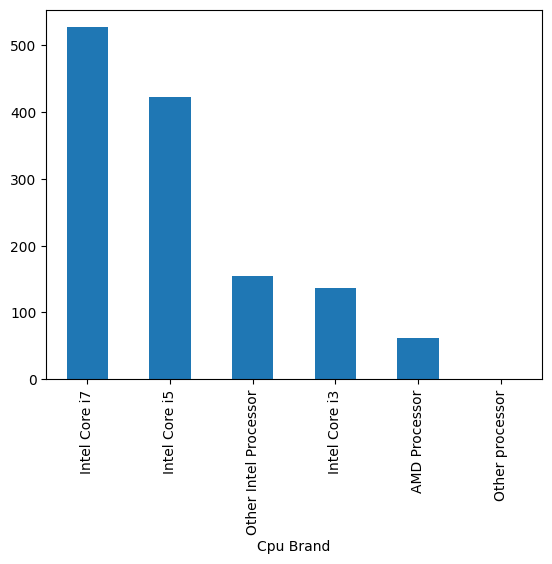

In [223]:
def categorise_processors(txt):
    if txt == 'Intel Core i7' or txt == 'Intel Core i5' or txt == 'Intel Core i3':
        return txt
    else:
        if 'Intel' == txt.split()[0]:
            return 'Other Intel Processor'
        elif 'AMD' == txt.split()[0]:
            return 'AMD Processor'
        else:
            return 'Other processor'
        
df['Cpu Brand'] = df['Cpu Brand'].apply(categorise_processors)
df['Cpu Brand'].value_counts().plot(kind='bar')

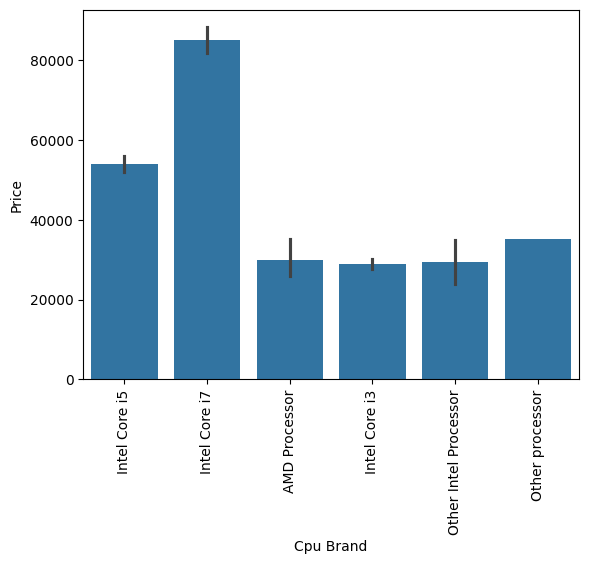

In [224]:
sns.barplot(x=df['Cpu Brand'],y=df['Price']
            )
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='Cpu Speed'>

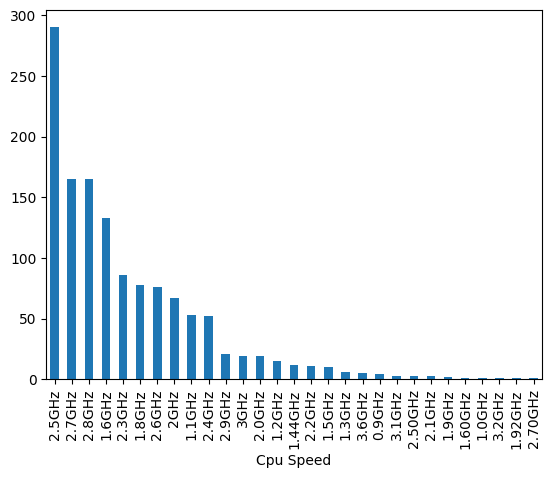

In [225]:
df['Cpu Speed'].value_counts().plot(kind = 'bar')

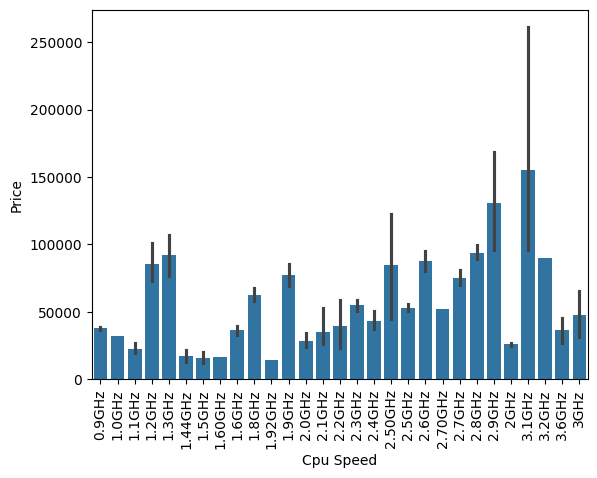

In [226]:
dummmy = df.sort_values('Cpu Speed')
sns.barplot(x=dummmy['Cpu Speed'],y=dummmy['Price']
            )
plt.xticks(rotation = 'vertical')
plt.show()

In [227]:
# no connection of price and processor speed so droping this
df.drop(columns=['Cpu Speed'],inplace=True)

In [228]:
df.drop(columns=['Cpu'],inplace=True)

<Axes: xlabel='Ram'>

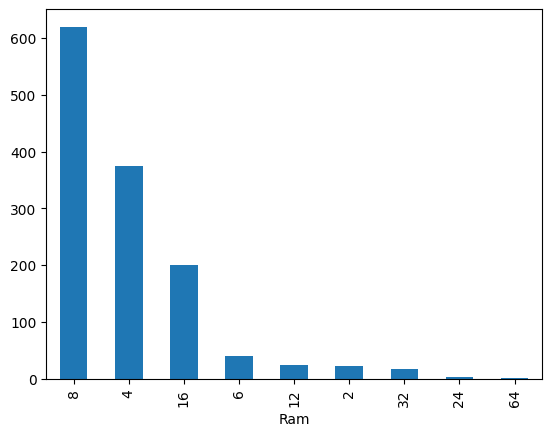

In [229]:
# focusing Ram
df['Ram'].value_counts().plot(kind='bar')


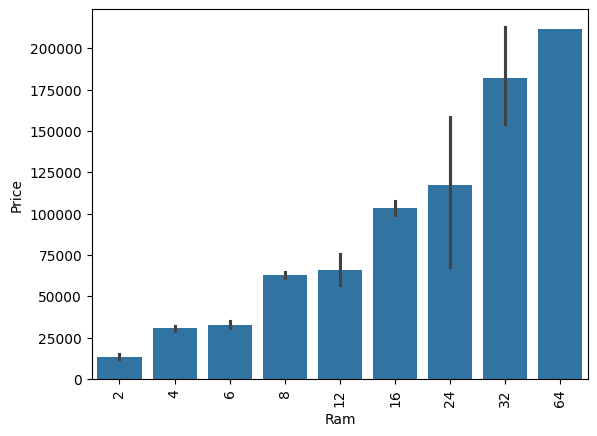

In [230]:
sns.barplot(x=df['Ram'],y=df['Price']
            )
plt.xticks(rotation = 'vertical')
plt.show()
# very high corelations

In [231]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [232]:
df['Memory'] =df['Memory'].astype(str).str.replace('/.0','',regex=True)
df['Memory'] =df['Memory'].str.replace('GB','')
df['Memory'] =df['Memory'].str.replace('TB','000')

new = df['Memory'].str.split('+',n=1,expand=True)
df['first'] = new[0]
df['first'] = df['first'].astype('string')
df['first'] = df['first'].str.strip()
df['second'] = new[1]
df['second'] = df['second'].astype('string')

df['second'] = df['second'].str.strip()

df['L1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0 )
df['L1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0 )
df['L1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0 )
df['L1Flash_storage'] = df['first'].apply(lambda x: 1 if 'Flash' in x else 0 )

df['first'] = df['first'].replace(r'/D','')
df['second'] = df['second'].fillna("0")

df['L2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0 )
df['L2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0 )
df['L2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0 )
df['L2Flash_storage'] = df['second'].apply(lambda x: 1 if 'Flash' in x else 0 )

df['second'].replace(r'/D','',inplace=True)


C:\Users\Nikhi\AppData\Local\Temp\ipykernel_22092\1030691308.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['second'].replace(r'/D','',inplace=True)


In [233]:
df['first']  = df['first'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)
df['first']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: string

In [234]:

df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')

df['HDD'] = df['first'] * df['L1HDD'] + df['second']*df['L2HDD']
df['SSD'] = df['first'] * df['L1SSD'] + df['second']*df['L2SSD']
df['Hybrid'] = df['first'] * df['L2Hybrid'] + df['second']*df['L2Hybrid']
df['Flash_Storage'] = df['first'] * df['L1Flash_storage'] + df['second']*df['L2Flash_storage']


In [236]:
df.drop(columns=['L1SSD','L1HDD','L1Hybrid','L1Flash_storage','first','L2SSD','L2HDD','L2Hybrid','L2Flash_storage','second','Memory'],inplace=True)

In [242]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS Panel        0.252208
PPI              0.473487
HDD             -0.093701
SSD              0.670799
Hybrid           0.105165
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [244]:
df.drop(columns=['Flash_Storage','Hybrid'],inplace=True)


In [246]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [247]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x: x.split()[0])


In [249]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [253]:
df = df[df['Gpu Brand'] != 'ARM']

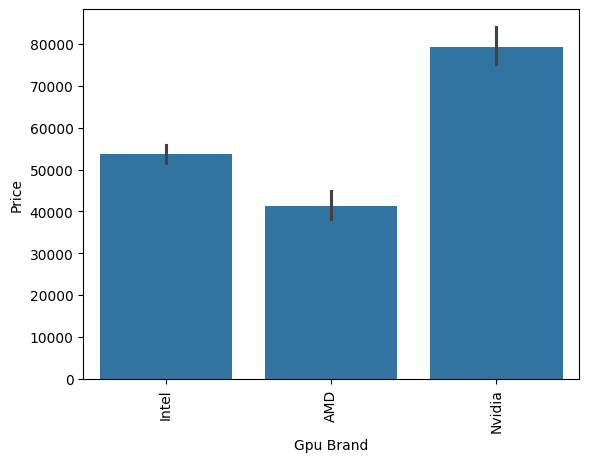

In [256]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()